# Tutorial: Getting Started with Transformers

**Learning goals:** The goal of this tutorial is to learn how:

1. Transformer neural networks can be used to tackle a wide range of tasks in natural language processing and beyond.
3. Transfer learning allows one to adapt Transformers to specific tasks.
2. The `pipeline()` function from the `transformers` library can be used to run inference with models from the [Hugging Face Hub](https://huggingface.co/models).

This tutorial is based on the first of our O'Reilly book [_Natural Language Processing with Transformers_](https://transformersbook.com/) - check it out if you want to dive deeper into the topic!

**Duration**: 30-45 minutes

**Prerequisites:** Knowledge of Python and basic familiarity with machine learning


**Author**: [Lewis Tunstall](https://twitter.com/_lewtun) (feel free to ping me with any questions about this tutorial)

All of these steps can be done for free! All you need is an Internet browser and a place where you can write Python 👩‍💻

## Why Transformers?

Deep learning is currently undergoing a period of rapid progress across a wide variety of domains, including:

* 📖 Natural language processing
* 👀 Computer vision
* 🔊 Audio
* 🧬 Biology
* and many more!

The main driver of these breakthroughs is the **Transformer** -- a novel **neural network** developed by Google researchers in 2017. In short, if you’re into deep learning, you need Transformers!

Here's a few examples of what Transformers can do:

* 💻 They can **generate code** as in products like [GitHub Copilot](https://copilot.github.com/), which is based on OpenAI's family of [GPT models](https://huggingface.co/gpt2?text=My+name+is+Clara+and+I+am).
* ❓ They can be used for **improve search engines**, like [Google did](https://www.blog.google/products/search/search-language-understanding-bert/) with a Transformer called [BERT](https://huggingface.co/bert-base-uncased).
* 🗣️ They can **process speech in multiple languages** to perform speech recognition, speech translation, and language identification. For example, Facebook's [XLS-R model](https://huggingface.co/spaces/facebook/XLS-R-2B-22-16) can automatically transcribe audio in one language to another!

Training these models **from scratch** involves **a lot of resources**: you need large amounts of compute, data, and days to train for 😱.

Fortunately, you don't need to do this in most cases! Thanks to a technique known as **transfer learning**, it is possible to adapt a model that has been trained from scratch (usually called a **pretrained model**), to a variety of downstream tasks. This process is called **fine-tuning** and can typically be carried with a single GPU and a dataset of the size that you're like to find in your university or company.

The models that we'll be looking at in this tutorial are all examples of fine-tuned models, and you can learn more about the transfer learning process in the video below:


Now, Transformers are coolest kids in town, but how can we use them? If only there was a library that could help us ... oh wait, there is! The [Hugging Face Transformers library](https://github.com/huggingface/transformers) provides a unified API across dozens of Transformer architectures, as well as the means to train models and run inference with them. So to get started, let's install the library with the following command:

In [1]:
%%capture
%pip install transformers[sentencepiece]

%matplotlib inline
!which python

Now that we've installed the library, let's take a look at some applications!

## Pipelines for Transformers

The fastest way to learn what Transformers can do is via the `pipeline()` function. This function loads a model from the Hugging Face Hub and takes care of all the preprocessing and postprocessing steps that are needed to convert inputs into predictions:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/pipeline.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=800>

In the next few sections we'll see how these steps are combined for different applications. If you want to learn more about what is happening under the hood, then check out the video below:

### Models

Click on the links below can access about 600,000 transformer models as of today on huggingface:

https://huggingface.co/models?library=transformers&sort=trending

### Pipeline

This link provides the documentation of the pipeline

https://huggingface.co/docs/transformers/en/main_classes/pipelines

Run the code below to print out all current supported tasks via pipeline.

In [2]:
from transformers import pipeline
from transformers.pipelines import SUPPORTED_TASKS

# Print all available pipeline tasks
for task in SUPPORTED_TASKS:
    print(task)

audio-classification
automatic-speech-recognition
text-to-audio
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
visual-question-answering
document-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
zero-shot-image-classification
zero-shot-audio-classification
image-classification
image-feature-extraction
image-segmentation
image-to-text
image-text-to-text
object-detection
zero-shot-object-detection
depth-estimation
video-classification
mask-generation
image-to-image


## Task 1. Text classification

Let's start with one of the most common tasks in NLP: text classification. We need a snippet of text for our models to analyze, so let's use the following (fictious!) customer feedback about a certain online order:

In [3]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

While we're at it, let's create a simple wrapper so that we can pretty print out texts:

In [4]:
import textwrap

wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(text))

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.


Now suppose that we'd like to predict the _sentiment_ of this text, i.e. whether the feedback is positive or negative. This is a special type of text classification that is often used in industry to aggregate customer feedback across products or services. The example below shows how a Transformer like BERT converts the inputs into atomic chunks called **tokens** which are then fed through the network to produce a single prediction:

<img src="https://raw.githubusercontent.com/huggingface/workshops/refs/heads/main/nlp-zurich/images/clf_arch.png" alt="Alt text that describes the graphic" title="Title text" width=600>

To load a Transformer model for this task is quite simple. We just need to specify the task in the `pipeline()` function as follows;

In [5]:
sentiment_pipeline = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


When you run this code, you'll see a message about which Hub model is being used by default. In this case, the `pipeline()` function loads the `distilbert-base-uncased-finetuned-sst-2-english` model, which is a small BERT variant trained on [SST-2](https://paperswithcode.com/sota/sentiment-analysis-on-sst-2-binary) which is a sentiment analysis dataset.

💡 The first time you execute the code, the model will be automatically downloaded from the Hub and cached for later use!

Now we are ready to run our example through pipeline and look at some predictions:

In [6]:
sentiment_pipeline(text)

[{'label': 'NEGATIVE', 'score': 0.9015458226203918}]

The model predicts negative sentiment with a high confidence which makes sense given that we have a disgruntled customer. You can also see that the pipeline returns a list of Python dictionaries with the predictions. We can also pass several texts at the same time in which case we would get several dicts in the list for each text one.

**Practice 1:** Feed a list of texts with different types of sentiment to the `sentiment_pipeline` object. Do the predictions always make sense?

In [9]:
# Your code goes here:

# text generated by ChatGPT with prompt "give me a random paragraph about apples"
text2 = "Apples are one of the most widely cultivated fruits in the world, known for their crisp texture, sweet-tart flavor, and vibrant varieties ranging from deep red to golden yellow and bright green. They have been grown for thousands of years and are often associated with health due to their high fiber content and range of antioxidants. Whether eaten raw, baked into pies, pressed into cider, or dried into snacks, apples are incredibly versatile. In addition to their culinary uses, they also hold cultural and symbolic significance in many societies, often representing knowledge, temptation, and even immortality."

wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(text2))

sentiment_pipeline(text2)

Apples are one of the most widely cultivated fruits in the world, known for
their crisp texture, sweet-tart flavor, and vibrant varieties ranging from deep
red to golden yellow and bright green. They have been grown for thousands of
years and are often associated with health due to their high fiber content and
range of antioxidants. Whether eaten raw, baked into pies, pressed into cider,
or dried into snacks, apples are incredibly versatile. In addition to their
culinary uses, they also hold cultural and symbolic significance in many
societies, often representing knowledge, temptation, and even immortality.


[{'label': 'POSITIVE', 'score': 0.9998219609260559}]

## Task 2: Question answering

In this task, the model is given a **question** and a **context** and needs to find the answer to the question within the context. This problem can be rephrased as a classification problem: For each token the model needs to predict whether it is the start or the end of the answer. In the end we can extract the answer by looking at the span between the token with the highest start probability and highest end probability:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/qa_arch.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=600>

You can imagine that this requires quite a bit of pre- and post-processing logic. Good thing that the pipeline takes care of all that! As usual, we load the model by specifying the task in the `pipeline()` function:

In [11]:
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


This default model is trained on the famous [SQuAD dataset](https://huggingface.co/datasets/squad). Let's see if we can ask it what the customer wants:

In [12]:
question = "What does the customer want?"

outputs = qa_pipeline(question=question, context=text)
outputs

{'score': 0.6312921047210693,
 'start': 335,
 'end': 358,
 'answer': 'an exchange of Megatron'}

Awesome, that sounds about right!


**Practice 2:** Ask a question related to the text you provided in practice 1.

In [16]:
# Your code goes here:

qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
question = "What is this paragraph about?"
outputs = qa_pipeline(question=question, context=text2)
print(outputs)

Device set to use mps:0


{'score': 0.020633934065699577, 'start': 570, 'end': 613, 'answer': 'knowledge, temptation, and even immortality'}


## Task 3: Text summarization

Let's see if we can go beyond these natural language understanding tasks (NLU) where BERT excels and delve into the generative domain. Note that generation is much more computationally demanding since we usually generate one token at a time and need to run this several times. An example for how this process works is shown below:

<img src="https://raw.githubusercontent.com/huggingface/workshops/refs/heads/main/nlp-zurich/images/gen_steps.png" alt="Alt text that describes the graphic" title="Title text" width=600>

A popular task involving generation is summarization. Let's see if we can use a transformer to generate a summary for us:

In [17]:
summarization_pipeline = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


This model is trained was trained on the [CNN/Dailymail dataset](https://huggingface.co/datasets/cnn_dailymail) to summarize news articles.

In [18]:
outputs = summarization_pipeline(text, max_length=45, clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['summary_text']))

Your min_length=56 must be inferior than your max_length=45.
/opt/homebrew/anaconda3/envs/aiml/lib/python3.12/site-packages/transformers/generation/utils.py:1570: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead.


That's not too bad! We can see the model was able to get the main gist of the customer feedback and even identified the author as "Bumblebee".

**Practice 3:** Summarize the text you provided in practice 1.

In [21]:
# Your code goes here:

outputs = summarization_pipeline(text2, max_length=80, clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['summary_text']))


 Apples are one of the most widely cultivated fruits in the world, known for
their crisp texture, sweet-tart flavor, and vibrant varieties ranging from deep
red to golden yellow and bright green. They have been grown for thousands of
years and are often associated with health due to their high fiber content and
range of antioxidants.


## Task 4: Translation

But what if there is no model in the language of my data? You can still try to translate the text. The [Helsinki NLP team](https://huggingface.co/Helsinki-NLP) has provided over 1,000 language pair models for translation 🤯. Here we load one that translates English to Chinese:

In [29]:
from transformers import pipeline

translator = pipeline("translation_en_to_zh", model="Helsinki-NLP/opus-mt-en-zh")

# another model
# translator = pipeline("translation_en_to_cn", model = "liam168/trans-opus-mt-en-zh")

Device set to use mps:0


Let's translate the our text to Chinese:

In [30]:
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(wrapper.fill(outputs[0]['translation_text']))

亲爱的亚马逊,上星期我从你在德国的网上商店订购了一台 " Optimus Prime Action " 人物。
不幸的是,当我打开这个软件包时,我惊恐地发现,我被派去的是威震天的动作人物!作为霸天虎的终身敌人,我希望你能够理解我的两难处境。为了解决这个问题,我要求用威震天来交换我订购的
" Optimus Prime Prime " 人物。我附上我购买该软件的记录的副本。我期待很快听到你的消息。真诚的,大黄蜂。


We can see that the text is clearly not perfectly translated, but the core meaning stays the same. Another cool application of translation models is data augmentation via backtranslation!

**Practice 4:** Pick up a different translation model that can translating English to another language from [Helsinki-NLP](https://huggingface.co/Helsinki-NLP) or other models avaiable on huggingface. Please translate the text you provided in practice 1 to the target language.

In [31]:
# Your code goes here:

translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")

outputs = translator(text2, clean_up_tokenization_spaces=True, min_length=100)
print(wrapper.fill(outputs[0]['translation_text']))


Device set to use mps:0


Las manzanas son una de las frutas más cultivadas del mundo, conocidas por su
textura crujiente, sabor dulce y vibrantes variedades que van desde el rojo
profundo hasta el amarillo dorado y el verde brillante. Han sido cultivadas
durante miles de años y a menudo se asocian con la salud debido a su alto
contenido de fibra y gama de antioxidantes. Ya sea comido crudo, horneado en
pasteles, prensado en sidra o seco en bocadillos, las manzanas son
increíblemente versátiles. Además de sus usos culinarios, también tienen
significado cultural y simbólico en muchas sociedades, a menudo representando
conocimiento, tentación e incluso inmortalidad.


## Task 5: Computer Vision

As mentioned at the start of this tutorial, Transformers can also be used for domains other than NLP! For these domains, there are many more pipelines that you can experiment with.

Let's have a look at an application involving images!

Recently, transformer models have also entered computer vision. Check out the DETR model on the [Hub](https://huggingface.co/facebook/detr-resnet-50), which stands for DEtection TRansformer. It is a deep learning model for object detection.

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/object_detection.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

In [32]:
"""
Run this code cell to avoid folling warning:
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for layer3.2.conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass assign=True to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
"""
import os
os.environ["ACCELERATE_DISABLE_TORCH_COMPILE"] = "1"


We will load DETR model from facebook at this [link](https://huggingface.co/facebook/detr-resnet-50).

In [33]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load pretrained DETR model and feature extractor
feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')


/opt/homebrew/anaconda3/envs/aiml/lib/python3.12/site-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/aiml/lib/python3.12/site-packages/torch/nn/modules/module.py:2400: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/opt/homebrew/anaconda3/envs/aiml/lib/python3.12/site-packages/torch/nn/modules/module.py:2400: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dicti

We defines a function below to visualize the results.

In [34]:
def object_detection(url = None, local = None, threshold = 0.9):

    # Step 1: Load the image
    if url: # if passing a url
        image = Image.open(requests.get(url, stream=True).raw)
    elif local: # if passing a local path
        image = Image.open(local)

    # Step 2: Preprocess the image
    inputs = feature_extractor(images=image, return_tensors="pt")

    # Step 3: Run model without gradient tracking
    with torch.no_grad():
        outputs = model(**inputs)

    # Step 4: Post-process the outputs to get image-scale predictions
    target_sizes = [image.size[::-1]]  # (height, width)
    results = feature_extractor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

    boxes = results['boxes']      # Tensor of shape [N, 4]
    scores = results['scores']    # Tensor of shape [N]
    labels = results['labels']    # Tensor of shape [N]

    # Step 5: Filter by confidence threshold
    keep = scores > threshold
    boxes = boxes[keep]
    scores = scores[keep]
    labels = labels[keep]

    # Step 6: Plot the results
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    for box, label, score in zip(boxes, labels, scores):
        xmin, ymin, xmax, ymax = box.detach().numpy()
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2,
                                edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'{model.config.id2label[label.item()]}: {score:.2f}', color='white',
                bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()


Passing a url of image to the object detection. It shows the detected object in the box with name and confidence score.

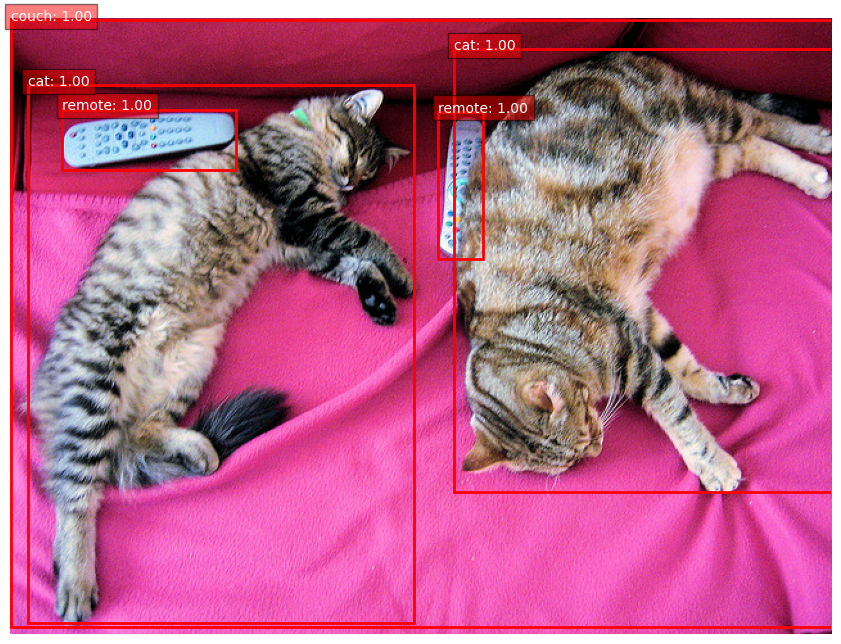

In [35]:
url_path = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# url_path = 'https://images.pexels.com/photos/37347/office-sitting-room-executive-sitting.jpg'

object_detection(url = url_path)

We also can pass a local uploaded image.

You can upload an image from your laptop to the current temporary folder and run the code below.

**Practice 5** Provide an image via url or uploading and test the model `facebook/detr-resnet-50`. How good is the model in detecting the objects in your image?

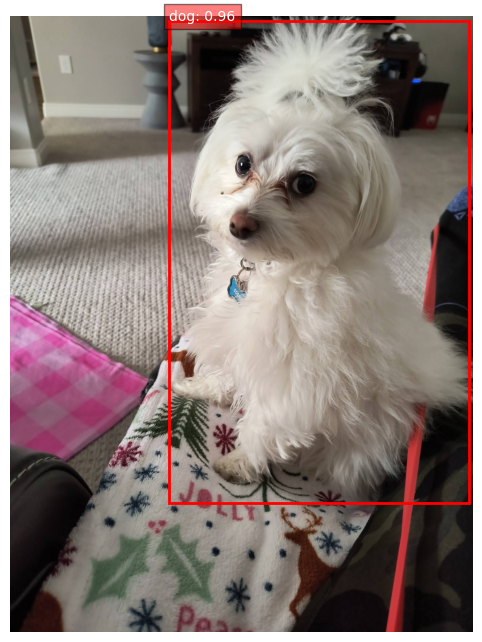

In [37]:
local_path = '1.jpg'
object_detection(local = local_path)

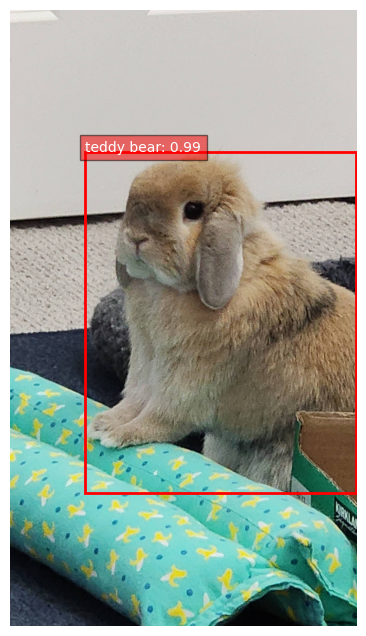

In [38]:
local_path = '2.jpg'
object_detection(local = local_path)

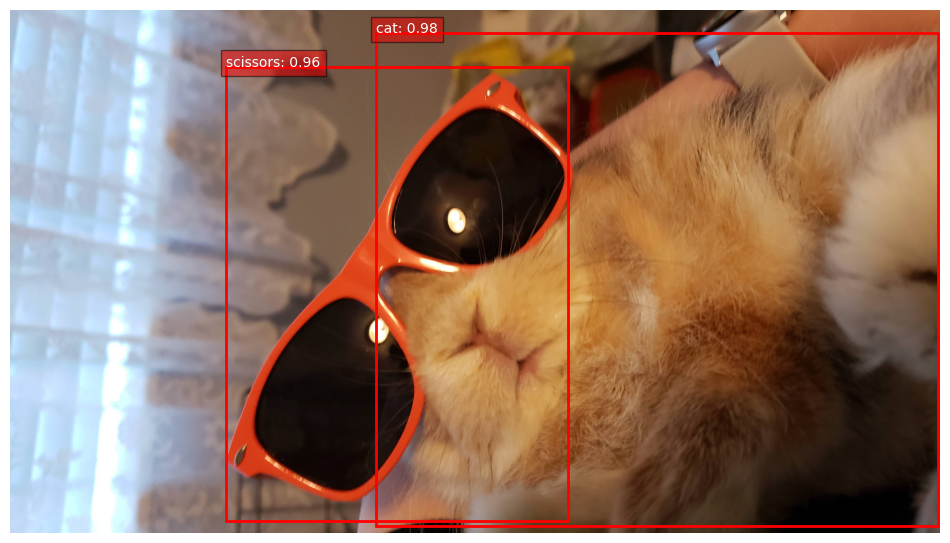

In [39]:
local_path = '3.jpg'
object_detection(local = local_path)

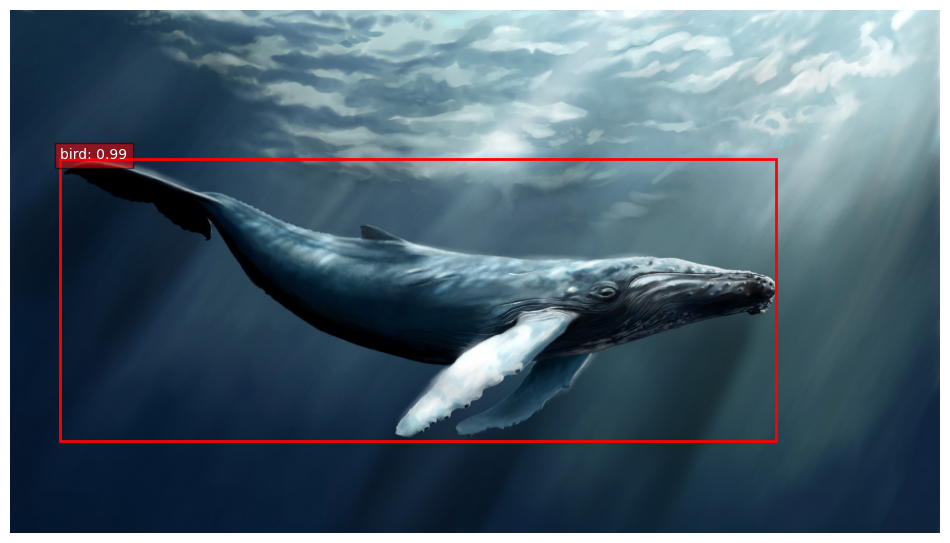

In [40]:
local_path = '4.jpg'
object_detection(local = local_path)

## More Tasks on Audio and etc.

### Audio

Another promising area is audio processing. Especially Speech2Text there have been some promising advancements recently. See for example the [wav2vec2 model](https://huggingface.co/facebook/wav2vec2-base-960h):


<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/speech2text.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

### Table QA

Finally, a lot of real world data is still in form of tables. Being able to query tables is very useful and with [TAPAS](https://huggingface.co/google/tapas-large-finetuned-wtq) you can do tabular question-answering:

<img src="https://github.com/huggingface/workshops/blob/main/nlp-zurich/images/tapas.png?raw=1" alt="Alt text that describes the graphic" title="Title text" width=400>

**Practice 6** `Expore the huggingface.` Please choose a task and a model that we have not introduced so far from huggingface and try it below.

For example, I chosed `Text-to-Audio` from `Tasks` and `Transformers` from `Libraries`. Then I obtained a list of models ranked by Trending at [here](https://huggingface.co/models?pipeline_tag=text-to-audio&library=transformers&sort=trending), where the first model is [MusicGen](https://huggingface.co/facebook/musicgen-small) from text by Facebook.

In [47]:
from transformers import MusicgenForConditionalGeneration, AutoProcessor
import torch
import torchaudio

# Load model and processor
model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")
processor = AutoProcessor.from_pretrained("facebook/musicgen-small")

# Prepare text prompt
inputs = processor(text=["a relaxing acoustic guitar melody"], return_tensors="pt")

# Generate audio tokens
audio_tokens = model.generate(**inputs, max_new_tokens=256)

# Decode tokens to waveform
waveforms = processor.batch_decode(audio_tokens)

waveform = waveforms[0]
if not isinstance(waveform, torch.Tensor):
    waveform = torch.tensor(waveform)

if waveform.ndim == 1:
    waveform = waveform.unsqueeze(0)

# Save waveform to file
sample_rate = 32000
torchaudio.save("generated_music.wav", waveform, sample_rate)

print("✅ Audio saved as 'generated_music.wav'")


Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summ

✅ Audio saved as 'generated_music.wav'


## Where to next?

Hopefully this tutorial has given you a taste of what Transformers can do and you're now excited to learn more! Here's a few resources you can use to dive deeper into the topic and the Hugging Face ecosystem:

🤗 **A Tour through the Hugging Face Hub**

In this tutorial, you get to:
- Explore the over 30,000 models shared in the Hub.
- Learn efficient ways to find the right model and datasets for your own task.
- Learn how to contribute and work collaboratively in your ML workflows

***Duration: 20-40 minutes***

👉 [click here to access the tutorial](https://www.notion.so/Workshop-A-Tour-through-the-Hugging-Face-Hub-2098e4bae9ba4288857e85c87ff1c851)

✨ **Build and Host Machine Learning Demos with Gradio & Hugging Face**

In this tutorial, you get to:
- Explore ML demos created by the community.
- Build a quick demo for your machine learning model in Python using the `gradio` library
- Host the demos for free with Hugging Face Spaces
- Add your demo to the Hugging Face org for your class or conference

***Duration: 20-40 minutes***

👉 [click here to access the tutorial](https://colab.research.google.com/github.com/huggingface/education-toolkit/tree/main/02_ml-demos-with-gradio.ipynb)

🎓 **The Hugging Face Course**

This course teaches you about applying Transformers to various tasks in natural language processing and beyond. Along the way, you'll learn how to use the Hugging Face ecosystem — 🤗 Transformers, 🤗 Datasets, 🤗 Tokenizers, and 🤗 Accelerate — as well as the Hugging Face Hub. It's completely free too!